In [1]:
import numpy as np
import cv2
from pathlib import Path

In [2]:
import sys
sys.path.append('../src')
from dcp_dehaze import DCP
from dcp_dehaze.filters import guided_filter

In [ ]:
TEST_IMAGE_PATH = Path('../data/paper/hazed/3.png')
image = cv2.imread(TEST_IMAGE_PATH)

In [4]:
dcp = DCP.compute_square(image.astype(np.float64), 5)
filtered_dcp = guided_filter(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), dcp, r=5, eps=0.001)

In [5]:
c_inf = DCP.compute_atmospheric_light(filtered_dcp, image)
print("Atmospheric light:", c_inf)

Atmospheric light: [219 216 217]


In [6]:
transmittance = 1 - filtered_dcp / min(c_inf)

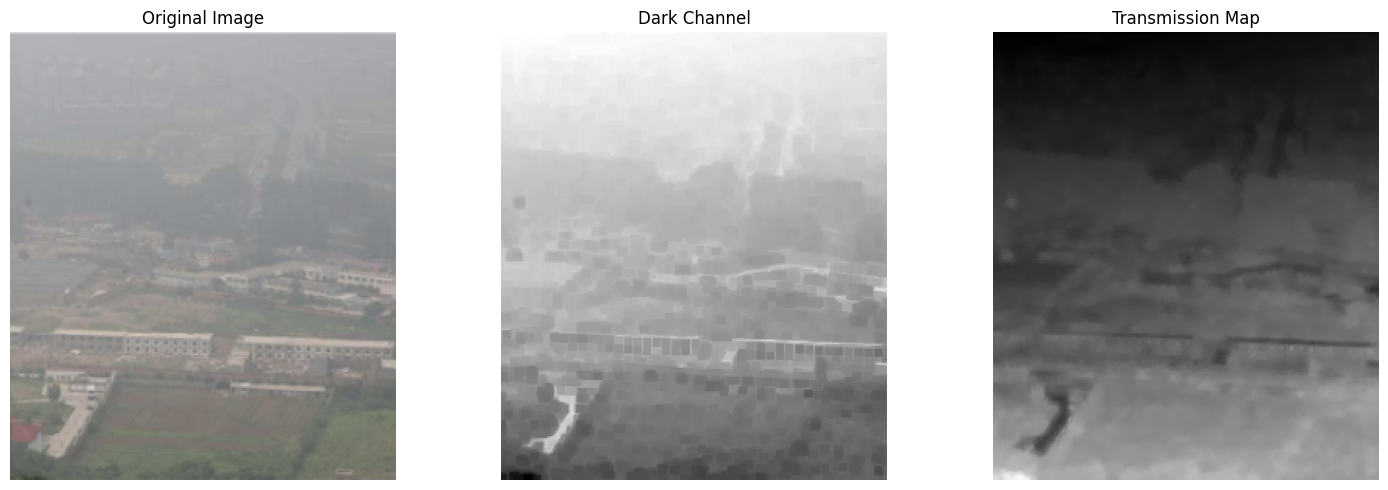

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(dcp, cmap='gray')
plt.title('Dark Channel')
plt.axis('off')

plt.subplot(133)
plt.imshow(transmittance, cmap='gray')
plt.title('Transmission Map')
plt.axis('off')

plt.tight_layout()
plt.show()


In [10]:
EPS = 0.1
clean_image = (image.astype(np.float64) - c_inf.astype(np.float64)) / np.maximum(transmittance, EPS)[..., np.newaxis] + c_inf.astype(np.float64)
clean_image = np.clip(clean_image, 0, 255).astype(np.uint8)

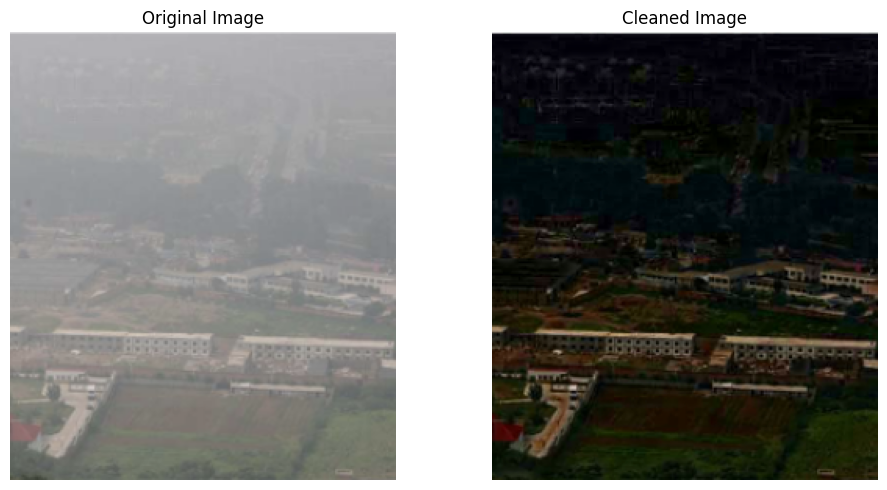

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(clean_image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title('Cleaned Image')
plt.axis('off')

plt.tight_layout()
plt.show()
